In [2]:
import matplotlib.pyplot as plt
import pandas as pd

Matplotlib is building the font cache; this may take a moment.


In [1]:
pip install tensorflow==2.13.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 28.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 124.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 113.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 103.9 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERRO

In [15]:
optim_params = {
    
    
    'proposed_ASGD_amsgrad_version': {
        'weight_decay': 0.0001,
        'lr_min': 0.001,
        'lr_max':0.01,
        #'lr': 0, # dummy value
        'b1': 0.9,
        'b2': 0.999,
        'color': 'red',
        'linestyle':'-'
    },
    'proposed_ASGD_adam_version': {
        'weight_decay': 0.0001,
        'lr_min': 0.001,
        'lr_max':0.01,
        #'lr': 0, # dummy value
        'b1': 0.9,
        'b2': 0.999,
        'color': 'blue',
        'linestyle':'-'
    },  
    
    
    'padam': {
        'weight_decay': 0.0005,
        'lr': 0.1,
        'p': 0.125,
        'b1': 0.9,
        'b2': 0.999,
        'color': 'darkred',
        'linestyle':'-'
    },
    'ASGD2': {
        'weight_decay': 0.0005,
        'lr': 0.1,
        'p': 0.125,
        'b1': 0.9,
        'b2': 0.999,
        'color': 'black',
        'linestyle':'-'
    },
    'adam': {
        'weight_decay': 0.0001,
        'lr': 0.001,
        'b1': 0.9,
        'b2': 0.99,
        'color': 'orange',
        'linestyle':'--'
    },
    'super': {
        'weight_decay': 0.025,
        'lr_min': 0.1,
        'b1': 0.9,
        'b2': 0.99,
        'color': 'magenta',
        'linestyle':'--'
    },
        'wada': {
        'weight_decay': 0.025,
        'lr_min': .001,
        'b1': 0.9,
        'b2': 0.99,
        'color': 'purple',
        'linestyle':'--'
    },
    'amsgrad': {
        'weight_decay': 0.0001,
        'lr': 0.001,
        'b1': 0.9,
        'b2': 0.99,
        'color' : 'darkgreen',
        'linestyle':'-.'
    },
    'sgd': {
        'weight_decay': 0.0005,
        'lr': 0.1,
        'm': 0.9,
        'color': 'blue',
        'linestyle':'-'
    }
}

In [16]:
parameter = ['loss','val_accuracy','val_top_k_categorical_accuracy'] #loss;val_acc;val_top_k_categorical_accuracy
#optimizers = ['proposed_ASGD','adam',  'amsgrad', 'padam']
optimizers = [ 'proposed_ASGD_amsgrad_version','proposed_ASGD_adam_version','ASGD2','padam', 'super','amsgrad']
#optimizers = ['proposed_ASGD_adam_version', 'adam', ]
dataset = 'cifar100'
files = []

In [17]:
label = {'loss':'Train Loss', 'val_accuracy':'Test Error', 'val_top_k_categorical_accuracy':'Test Error(top 5)'}

In [18]:
for optim in optimizers:
    files.append('log_'+optim + '_12_augment' + dataset +'.csv')

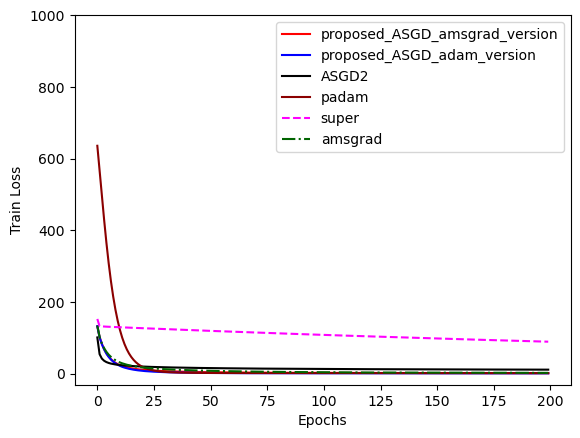

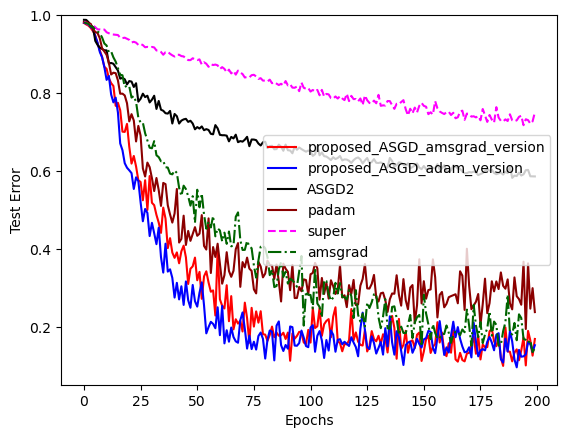

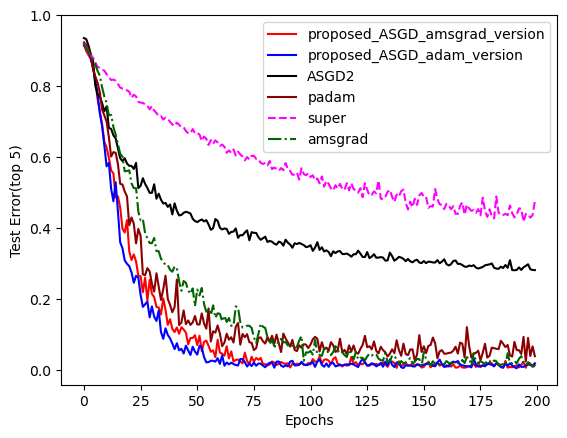

In [19]:
for param in parameter:        
    
    data = pd.DataFrame()
    
    for f in range(len(files)):
        df = pd.read_csv(files[f], delimiter = ';')
        data[optimizers[f]] = df[param]
    
    if param == 'val_accuracy' or param == 'val_top_k_categorical_accuracy':
        data = 1-data
        
    plt.figure()
    for optimizer in optimizers:
        op = optim_params[optimizer]
        data[optimizer].plot(color=op['color'], linestyle=op['linestyle'])
    if param=='loss':
        y_lim = 1000
    elif param == 'accuracy':
        y_lim =0.8
    else:
        y_lim= 1
        
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel(label[param])
    plt.ylim(top=y_lim)
    #plt.show()
    plt.savefig('figure_'+dataset+'_'+label[param]+'_new.pdf')

In [ ]:
optim